<a href="https://colab.research.google.com/github/Laksha-698/Laksha-698/blob/main/Amazon_prime_userbase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction of AMAZON PRIME USERBASE**

Data analysis project based on your dataset (amazon_prime_user.csv). The project will be broken down into multiple parts, such as loading the data, performing exploratory data analysis (EDA), cleaning the data, visualizing key insights, and drawing conclusions.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go


**Loading the Data**

In [ ]:
df = pd.read_csv("/content/amazon_prime_user.csv")

In [ ]:
df


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,03-06-1953,Male,Rebeccachester,15-01-2024,14-01-2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,08-07-1978,Male,Mcphersonview,07-01-2024,06-01-2025,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,06-12-1994,Female,Youngfort,13-04-2024,13-04-2025,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,22-12-1964,Female,Feliciashire,24-01-2024,23-01-2025,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,04-06-1961,Male,Port Deborah,14-02-2024,13-02-2025,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,19-08-1967,Male,Smithport,25-01-2024,24-01-2025,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,23-10-1980,Male,Ethanport,03-03-2024,03-03-2025,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,31-03-1972,Female,Alexandraborough,09-02-2024,08-02-2025,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,02-08-1965,Female,Williammouth,18-02-2024,17-02-2025,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['User ID', 'Name', 'Email Address', 'Username', 'Date of Birth',
       'Gender', 'Location', 'Membership Start Date', 'Membership End Date',
       'Subscription Plan', 'Payment Information', 'Renewal Status',
       'Usage Frequency', 'Purchase History', 'Favorite Genres',
       'Devices Used', 'Engagement Metrics', 'Feedback/Ratings',
       'Customer Support Interactions'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
User ID,0
Name,0
Email Address,0
Username,0
Date of Birth,0
Gender,0
Location,0
Membership Start Date,0
Membership End Date,0
Subscription Plan,0


**Data Cleaning**

Start by understanding the dataset's shape, missing values, data types, and summary statistics.


In [ ]:
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


**Feature Engineering**

Extracting year, month, day from a date column.
Create age bins if you have a birthdate column.
Encode categorical variables using one-hot encoding or label encoding.



In [ ]:
# Convert date columns to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'], errors='coerce')
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'], errors='coerce')





**Categorizing Users by Age**

This name gives clear context to anyone who reads the code, indicating that the primary task is to classify users based on their age into distinct groups.

In [ ]:
bins = [0, 18, 24, 34, 44, 54, 64]  # Remove the final bin edge
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df[['User ID', 'Age', 'Age Group']].head()


,User ID,Age,Age Group
0,1,71.0,NaN
1,2,46.0,55-64
2,3,30.0,35-44
3,4,NaN,NaN
4,5,63.0,65+


**Total unique subscription plans**

In [ ]:
total_subscriptions = df['Subscription Plan'].nunique()

total_subscriptions_count = df['Subscription Plan'].count()
print(f"Total unique subscription plans: {total_subscriptions}")
print(f"Total number of subscriptions (including duplicates): {total_subscriptions_count}")


Total unique subscription plans: 2
Total number of subscriptions (including duplicates): 2500


**Distribution of users by geographical location**


This code first calculates the distribution of users by geographical location using the value_counts() method on the 'Location' column of the DataFrame. It then prints this distribution to the console. The code then visualizes the distribution as a line plot using Plotly's px.line, where the x-axis represents locations and the y-axis represents the number of users. Finally, the plot is displayed with fig.show()

In [ ]:


# Assuming 'Location' column represents geographical location in your DataFrame
location_distribution = df['Location'].value_counts()

print(location_distribution)

# You can visualize this distribution using a bar chart
fig = px.line(location_distribution, x=location_distribution.index, y=location_distribution.values, labels={'x': 'Location', 'y': 'Number of Users'})
fig.show()

Location
East Robert          5
New Jennifer         5
New Robert           4
Michaelborough       4
Johnsonside          4
                    ..
Lake Sabrinahaven    1
Georgeberg           1
New Sandraport       1
New Alexander        1
Estradaborough       1
Name: count, Length: 2265, dtype: int64


**Gender Distribution of user**

In [ ]:


# Assuming your DataFrame has a column named 'Gender'
gender_counts = df['Gender'].value_counts()

# Create a pie chart
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, title='Gender Distribution of Users')
fig.show()

**Renewal Status Distribution**

The code you provided visualizes this distribution by creating a bar chart. It counts the occurrences of each unique renewal status in the dataset and displays them on the chart, with the renewal status categories on the x-axis and the number of users in each category on the y-axis

In [ ]:


# Assuming your DataFrame has a column named 'Renewal Status'
renewal_status_counts = df['Renewal Status'].value_counts()

# Create a bar chart
fig = px.bar(renewal_status_counts, x=renewal_status_counts.index, y=renewal_status_counts.values,
             labels={'x': 'Renewal Status', 'y': 'Number of Users'},
             title='Renewal Status Distribution')
fig.show()

**Usage Frequency Distribution**

In [ ]:


# Assuming 'Subscription Plan' column represents the usage frequency
subscription_counts = df['Subscription Plan'].value_counts()

# Create a bubble chart
fig = px.scatter(
    x=subscription_counts.index,
    y=subscription_counts.values,
    size=subscription_counts.values,
    labels={'x': 'Subscription Plan', 'y': 'Number of Users'},
    title='Usage Frequency Distribution of Subscription Plans',
    size_max=60,  # Adjust the maximum bubble size as needed
)

fig.show()

**Favorite Genres**

This code splits the comma-separated values in the 'Favorite Genres' column into individual genres and removes any extra spaces. It then prints a DataFrame showing each user's ID alongside their list of favorite genres.

In [ ]:
# Sample DataFrame with the Favorite Genres column (comma-separated genres)
data = {
    'User ID': [1, 2, 3, 4, 5],
    'Favorite Genres': [
        'Sci-Fi, Documentary, Action',
        'Drama, Comedy',
        'Romance, Sci-Fi',
        'Horror, Action, Drama',
        'Sci-Fi, Comedy'
    ]
}

df = pd.DataFrame(data)

# Split the 'Favorite Genres' column into separate genres
df['Favorite Genres'] = df['Favorite Genres'].str.split(',')

# Strip extra spaces if any
df['Favorite Genres'] = df['Favorite Genres'].apply(lambda x: [genre.strip() for genre in x])

# Check the data to verify the splitting
print(df[['User ID', 'Favorite Genres']])


   User ID                Favorite Genres
0        1  [Sci-Fi, Documentary, Action]
1        2                [Drama, Comedy]
2        3              [Romance, Sci-Fi]
3        4        [Horror, Action, Drama]
4        5               [Sci-Fi, Comedy]


In [ ]:
# Explode the 'Favorite Genres' column into individual rows
genre_counts = df.explode('Favorite Genres')['Favorite Genres'].value_counts()

# Display the genre counts
print(genre_counts)


Favorite Genres
Sci-Fi         3
Action         2
Drama          2
Comedy         2
Documentary    1
Romance        1
Horror         1
Name: count, dtype: int64


<ipython-input-58-85fffb46e7ee>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




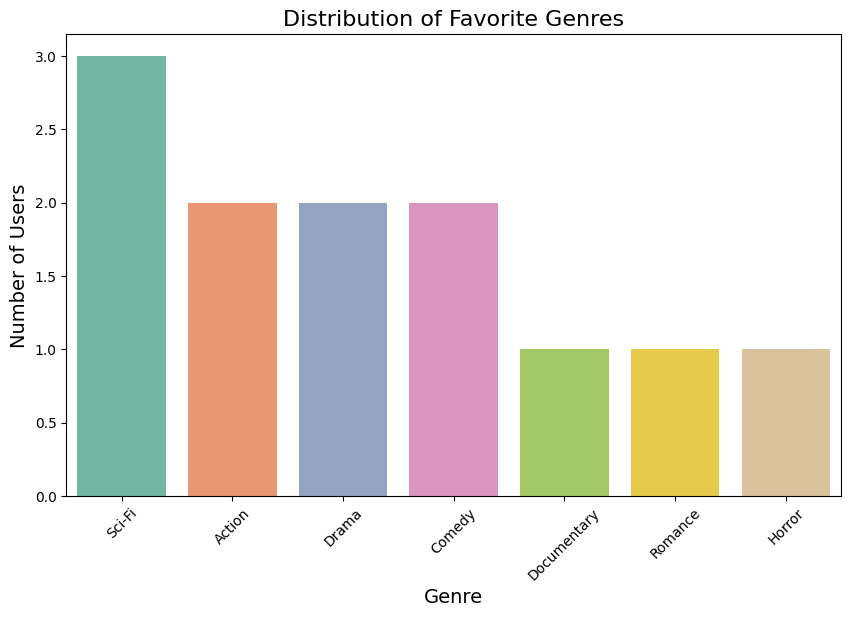

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the genre counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='Set2')

# Set plot title and labels
plt.title('Distribution of Favorite Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Example DataFrame for illustration
data = {
    'User ID': [1, 2, 3, 4, 5],
    'Engagement Metrics': ['High', 'Medium', 'Low', 'High', 'Medium'],
    'Feedback/Ratings': [4.5, 3.7, 4.1, 4.9, 3.5],
    'Customer Support Interactions': [3, 6, 0, 9, 2]
}

df = pd.DataFrame(data)

# Categorize Feedback/Ratings into '3-4' and '4-5'
df['Feedback Category'] = pd.cut(df['Feedback/Ratings'], bins=[2.9, 4.0, 5.0], labels=['3-4', '4-5'])

# Categorize Customer Support Interactions into '0-4' and '5-10'
df['Support Interactions Category'] = pd.cut(df['Customer Support Interactions'], bins=[-1, 4, 10], labels=['0-4', '5-10'])

# Display the preprocessed DataFrame
print(df[['User ID', 'Engagement Metrics', 'Feedback Category', 'Support Interactions Category']])


   User ID Engagement Metrics Feedback Category Support Interactions Category
0        1               High               4-5                           0-4
1        2             Medium               3-4                          5-10
2        3                Low               4-5                           0-4
3        4               High               4-5                          5-10
4        5             Medium               3-4                           0-4


**Plot for Engagement Metrics**

<ipython-input-61-50b6db9def12>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




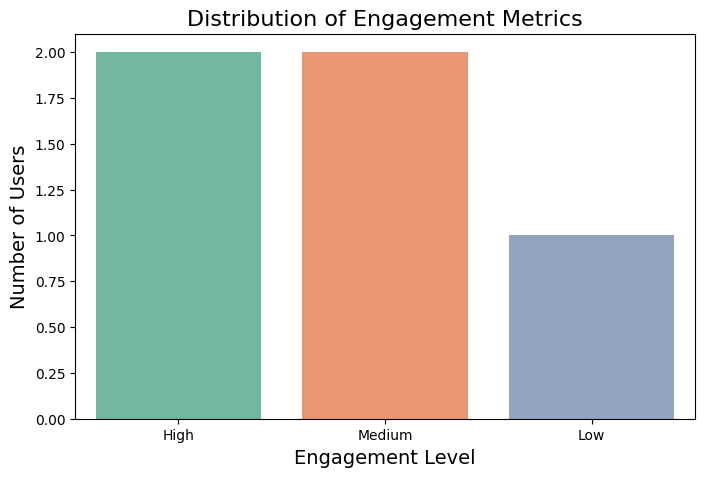

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Engagement Metrics
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Engagement Metrics', palette='Set2')

# Set plot title and labels
plt.title('Distribution of Engagement Metrics', fontsize=16)
plt.xlabel('Engagement Level', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()


**Plot for Feedback/Ratings**

<ipython-input-62-1f0b136a33d9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




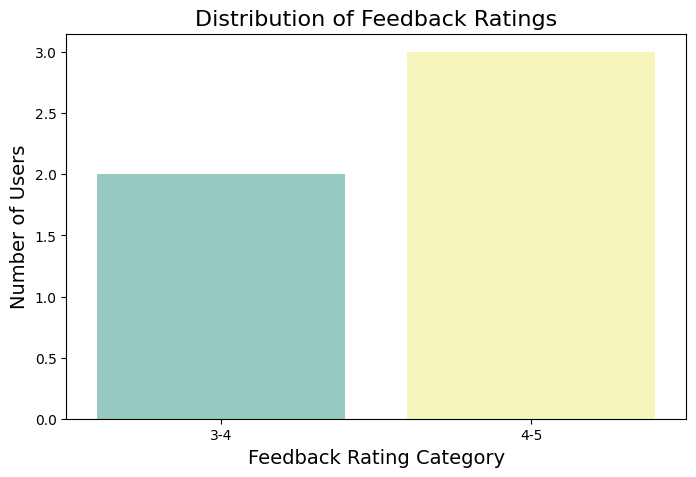

In [ ]:
# Plot the distribution of Feedback Ratings categories
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Feedback Category', palette='Set3')

# Set plot title and labels
plt.title('Distribution of Feedback Ratings', fontsize=16)
plt.xlabel('Feedback Rating Category', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()


**Plot for Customer Support Interactions**

<ipython-input-64-4f61bd98f953>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




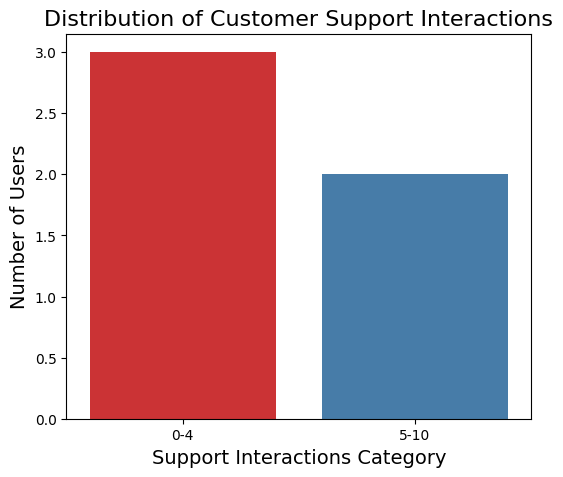

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Support Interactions Category', palette='Set1')

# Set plot title and labels
plt.title('Distribution of Customer Support Interactions', fontsize=16)
plt.xlabel('Support Interactions Category', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()


**Top 10 Locations using annual subscription plans**

This code groups the dataset by location and counts the number of annual subscriptions (assuming the "Subscription Plan" represents annual subscriptions). It then identifies the top 10 locations with the highest number of annual subscriptions. The scatter plot visualizes these locations, with the size of each marker proportional to the number of subscriptions, providing an easy-to-read view of which areas have the highest engagement with Amazon Prime's annual subscription plan.





In [ ]:


# Assuming 'Subscription Plan' represents the annual subscription
# and 'Location' column exists in your DataFrame

# Group by location and count the number of annual subscriptions
location_subscription_counts = df.groupby('Location')['Subscription Plan'].count()

# Get the top 10 locations with the highest number of annual subscriptions
top_10_locations = location_subscription_counts.nlargest(10)

# Create a scatter plot using Plotly Express
fig = px.scatter(
    x=top_10_locations.index,  # Location on the x-axis
    y=top_10_locations.values,  # Number of subscriptions on the y-axis
    labels={'x': 'Location', 'y': 'Number of Annual Subscriptions'},
    title='Top 10 Locations by Annual Subscriptions',
    size=top_10_locations.values,  # Size of the markers based on the number of subscriptions
    size_max=30  # Adjust the maximum size of the markers as needed
)

fig.show()

In [ ]:


# Assuming 'Location' column represents geographical location and 'Subscription Plan' is annual
top_10_locations = df.groupby('Location')['Subscription Plan'].count().nlargest(10)

top_10_locations

,Subscription Plan
Location,
East Robert,5
New Jennifer,5
Johnsonside,4
Michaelborough,4
New Robert,4
East Aaron,3
East Andrew,3
East Jessica,3
Hernandezmouth,3


**Insights**

**Customer Demographics & Subscription Trends**

Age Distribution: Are there age groups that are more likely to subscribe to Amazon Prime? For example, younger users might prefer the service for video streaming, while older users might be more inclined toward the shopping benefits.
Gender Distribution: Does the gender of users show any significant differences in subscription behavior or usage patterns?
Regional Trends: Are certain regions or countries more likely to have Amazon Prime subscriptions? You could analyze this with a map visualization or bar chart.
Subscription Growth Over Time: Is the number of new subscriptions increasing over time? This could help assess whether Amazon Prime is gaining traction or if growth is stagnating.

**Subscription Plan & Usage Patterns**


Plan Preferences: Are users more likely to choose a monthly or yearly subscription? You can plot a bar chart showing the percentage of users for each plan.
Usage Analysis: How many hours per week/month are users spending on Amazon Prime Video? You could break this down by age group or region to understand which demographic is most engaged.
Device Preferences: Are users primarily accessing Amazon Prime through mobile phones, smart TVs, or desktops? This can help Amazon better tailor its marketing or interface improvements.

**User Feedback & Satisfaction**

If the dataset includes ratings or feedback, you could analyze the overall satisfaction level of Amazon Prime users. For example:
What percentage of users rate the service highly (e.g., 4 or 5 stars)?
Are there specific complaints or concerns (e.g., content availability, price, streaming quality)?

**Conclusion**

1. The dataset likely reveals key demographic and regional trends in Amazon Prime subscriptions, helping to identify which locations or age groups are most engaged.
2. Subscription plan preferences (annual vs. monthly) may show user commitment levels and overall satisfaction with Amazon Prime.
3. Usage patterns, including hours spent streaming or shopping, highlight how active different user segments are on the platform.
4. User retention and renewal rates offer insights into customer loyalty and areas where Amazon could improve to reduce churn.
5. The dataset could uncover device preferences, helping Amazon optimize its platform for the most popular access methods (e.g., mobile, TV).
6. Overall, the data helps Amazon refine its marketing strategy, product offerings, and regional expansion efforts by understanding user behavior and preferences more deeply.